In [15]:
import numpy as np
input = np.array([1.54, 1.32])
weights = np.array([1.56, -0.45])
bias = np.array([0.0])


In [16]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


def make_prediction(input, weights, bias):
    # simple two layer network
    layer1 = np.dot(input, weights) + bias
    layer2 = sigmoid(layer1)
    return layer2
    

In [17]:
prediction = make_prediction(input, weights, bias)
print(f'The prediction is {prediction}')


The prediction is [0.85916839]


In [18]:
# basic gradient descent
target = 0
MSE = (prediction - target)**2
derivative = 2 * (prediction - target)
print(f'The derivative is {derivative}')

weights = weights - derivative
prediction = make_prediction(input, weights, bias)
MSE = (prediction - target)**2
print(f'The new prediction is {prediction}')


The derivative is [1.71833678]
The new prediction is [0.04285867]


In [19]:
# getting derivative of error function with respect to bias using backpropagation
d_error_wrt_prediction = 2*(prediction - target)
layer1_result = np.dot(input, weights) + bias 
d_prediction_wrt_layer1 = sigmoid(layer1_result) * (1 - sigmoid(layer1_result))     # derivative of sigmoid fn
d_layer1_wrt_bias = 1   # independent variable, so d(x)/dx = 1
d_error_wrt_bias = d_layer1_wrt_bias * d_prediction_wrt_layer1 * d_error_wrt_prediction  # chain rule
d_error_wrt_bias

array([0.00351628])

In [20]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        # learning_rate determines the magnitude by which we update params based on gradients
        self.learning_rate = learning_rate  

        # weights and bias randomly chosen
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def predict(self, input):
        layer1 = np.dot(input, self.weights) + self.bias
        layer2 = self.sigmoid(layer1)
        return layer2 

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1-self.sigmoid(x))

    def compute_gradients(self, input, target):
        layer1 = np.dot(input, self.weights) + self.bias 
        layer2 = self.sigmoid(layer1)
        prediction = layer2 

        d_error_wrt_prediction = 2*(prediction - target)
        d_prediction_wrt_layer1 = self.sigmoid_derivative(layer1)
        d_layer1_wrt_bias = 1
        d_error_wrt_bias = d_layer1_wrt_bias * d_prediction_wrt_layer1 * d_error_wrt_prediction
        
        d_layer1_wrt_weights = (input*1) + (self.weights*0)     # derivative of dot product
        d_error_wrt_weights = d_layer1_wrt_weights * d_prediction_wrt_layer1 * d_error_wrt_prediction
        return d_error_wrt_weights, d_error_wrt_bias

    def update_params(self, d_error_wrt_weights, d_error_wrt_bias):
        # modify params based on gradients observed
        self.bias = self.bias - (d_error_wrt_bias * self.learning_rate)
        self.weights = self.weights - (d_error_wrt_weights * self.learning_rate)

    def train(self, inputs, targets, iterations):
        cumulative_errors = []
        for i in range(iterations):
            # we train by picking a random data instance
            random_data_index = np.random.randint(len(input_vectors))
            input_vector = inputs[random_data_index]
            target = targets[random_data_index]

            # perfom gradient descent
            d_error_wrt_weights, d_error_wrt_bias = self.compute_gradients(
                input_vector, target
            )
            self.update_params(d_error_wrt_weights, d_error_wrt_bias)

            # calculate the error acroos data points every 100 iterations to get the trend of improvement
            if i % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = inputs[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)  # MSE
                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)
        return cumulative_errors

Text(0, 0.5, 'Error for all training instances')

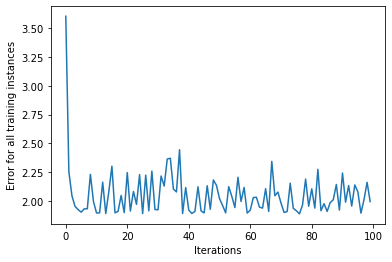

In [21]:
import matplotlib.pyplot as plt

# random input and targets
input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1],
    ]
)
targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])
learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)
training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")

Text(0, 0.5, 'Error for all training instances')

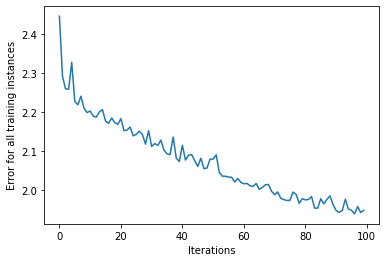

In [26]:
learning_rate = 0.01
neural_network = NeuralNetwork(learning_rate)
training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")

Text(0, 0.5, 'Error for all training instances')

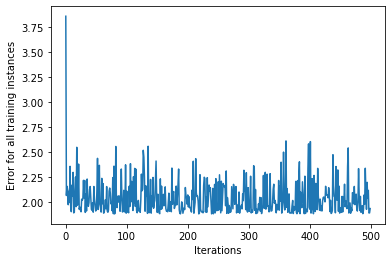

In [25]:
learning_rate = 0.1
neural_network = NeuralNetwork(learning_rate)
training_error = neural_network.train(input_vectors, targets, 50000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")

Text(0, 0.5, 'Error for all training instances')

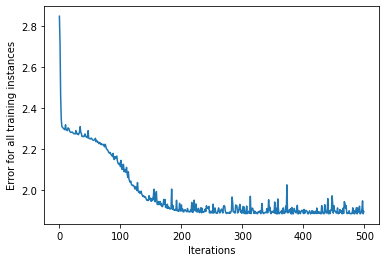

In [27]:
learning_rate = 0.01
neural_network = NeuralNetwork(learning_rate)
training_error = neural_network.train(input_vectors, targets, 50000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")